In [13]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

from tqdm import tqdm
import os

# MNIST - MLP

In [14]:
config = {
    'batch_size': 128,
    'shuffle': True,
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    'learning_rate': 0.001,
    'epochs': 10,
    'save_path': './models/MLP_net.pth',
}


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:04<00:00, 2.01MB/s]


Extracting /datasets\MNIST\raw\train-images-idx3-ubyte.gz to /datasets\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 365kB/s]


Extracting /datasets\MNIST\raw\train-labels-idx1-ubyte.gz to /datasets\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.54MB/s]


Extracting /datasets\MNIST\raw\t10k-images-idx3-ubyte.gz to /datasets\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 755kB/s]


Extracting /datasets\MNIST\raw\t10k-labels-idx1-ubyte.gz to /datasets\MNIST\raw



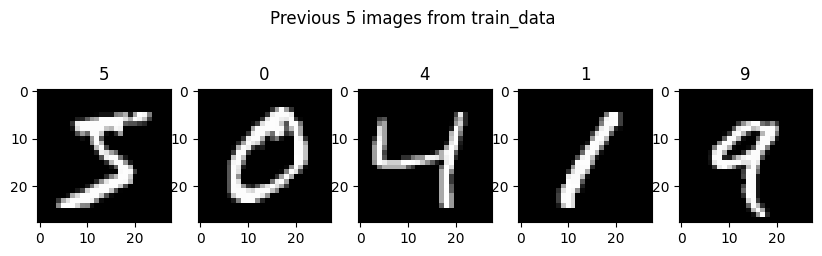

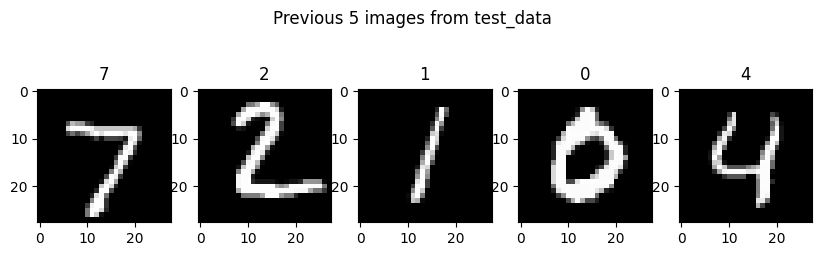

In [15]:
# fetch MNIST dataset
train_data = MNIST(root='./datasets', train=True, download=True, transform=ToTensor())
test_data = MNIST(root='/datasets', train=False, download=True, transform=ToTensor())

# create data loader
train_dataloader = DataLoader(train_data, batch_size=config['batch_size'], shuffle=config['shuffle'])
test_dataloader = DataLoader(test_data, batch_size=config['batch_size'], shuffle=config['shuffle'])

# show previous 5 image from train_data
fig, axs = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axs[i].imshow(train_data[i][0].squeeze().numpy(), cmap='gray')
    axs[i].set_title(train_data[i][1])
fig.suptitle('Previous 5 images from train_data')

# show previous 5 image from test_data
fig, axs = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axs[i].imshow(test_data[i][0].squeeze().numpy(), cmap='gray')
    axs[i].set_title(test_data[i][1])
fig.suptitle('Previous 5 images from test_data')

plt.show()

In [16]:
# define a MLP model
class MLP_net(torch.nn.Module):
    def __init__(self, input_dim=28*28, output_dim=10):
        super(MLP_net, self).__init__()

        self.fc1 = torch.nn.Linear(input_dim, 256)
        self.fc2 = torch.nn.Linear(256, 64)
        self.fc3 = torch.nn.Linear(64, output_dim)
        self.dropout = torch.nn.Dropout(0.3)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, input):
        x = input.reshape(-1, 28*28)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

model = MLP_net(input_dim=28*28, output_dim=10).to(config['device'])
print(model)

MLP_net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (softmax): Softmax(dim=1)
)


In [17]:
# define loss function
criterion = torch.nn.CrossEntropyLoss()

# define an optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=config['learning_rate'])

In [18]:
# training
model.train()

train_loss_history = []
train_accuracy_history = []
best_model = None
best_accuracy = 0
for epoch in tqdm(range(config['epochs'])):
    running_loss = 0
    running_accuracy = 0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(config['device']), labels.to(config['device'])
        images = images.view(-1, 28*28)

        output = model(images)
        loss = criterion(output, labels)
        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_accuracy += (pred == labels).float().mean()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss_history.append(running_loss / len(train_dataloader))
    train_accuracy_history.append(running_accuracy / len(train_dataloader))

    if running_accuracy / len(train_dataloader) > best_accuracy:
        best_accuracy = running_accuracy / len(train_dataloader)
        best_model = model.state_dict()
    print(f'Epoch\t{epoch+1}\tloss\t{running_loss/len(train_dataloader)}\taccuracy\t{running_accuracy/len(train_dataloader)}')


# if os.path.exists(config['save_path']) == False:
#     torch.save(model.state_dict(), config['save_path'])
torch.save(model.state_dict(), config['save_path'])


 10%|█         | 1/10 [00:09<01:26,  9.58s/it]

Epoch	1	loss	1.6301606463979301	accuracy	0.8497745990753174


 20%|██        | 2/10 [00:18<01:15,  9.38s/it]

Epoch	2	loss	1.563949410595111	accuracy	0.8995813727378845


 30%|███       | 3/10 [00:27<01:04,  9.24s/it]

Epoch	3	loss	1.5589579643725333	accuracy	0.9034126400947571


 40%|████      | 4/10 [00:36<00:53,  8.98s/it]

Epoch	4	loss	1.5548431217543353	accuracy	0.9070773720741272


 50%|█████     | 5/10 [00:45<00:45,  9.08s/it]

Epoch	5	loss	1.5528590844384134	accuracy	0.9084988236427307


 60%|██████    | 6/10 [00:55<00:37,  9.32s/it]

Epoch	6	loss	1.5524193704255353	accuracy	0.9089374542236328


 70%|███████   | 7/10 [01:04<00:27,  9.11s/it]

Epoch	7	loss	1.55283121462824	accuracy	0.9085766077041626


 80%|████████  | 8/10 [01:12<00:17,  8.94s/it]

Epoch	8	loss	1.5511930441297193	accuracy	0.9098259210586548


 90%|█████████ | 9/10 [01:22<00:09,  9.08s/it]

Epoch	9	loss	1.5500597275142223	accuracy	0.9108697772026062


100%|██████████| 10/10 [01:32<00:00,  9.21s/it]

Epoch	10	loss	1.552178117257954	accuracy	0.9086431860923767


In [19]:
# testing
model = MLP_net(input_dim=28*28, output_dim=10).to(config['device'])
model.load_state_dict(torch.load(config['save_path'], weights_only=True))
model.eval()

test_accuracy = 0
for epoch in tqdm(range(config['epochs'])):
    running_accuracy = 0
    for i, (images, labels) in enumerate(test_dataloader):
        images, labels = images.to(config['device']), labels.to(config['device'])
        images = images.view(-1, 28*28)

        output = model(images)
        pred = torch.argmax(output, dim=1)
        running_accuracy += (pred == labels).float().mean()
    test_accuracy += (running_accuracy/len(test_dataloader))
print(f'accuracy\t{test_accuracy/config["epochs"]}')


  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:14<00:00,  1.45s/it]

accuracy	0.9234771132469177
